<a href="https://colab.research.google.com/github/RAFS20/Analisis-de-datos/blob/main/Analisis_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Función de análisis de datos

In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import variation
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from scipy.stats import linregress


# Configuración global para mostrar solo 2 decimales
import sys
sys.displayhook = lambda x: print(f'{round(x, 2):.2f}')
sns.set(style='white')
plt.rcParams.update({'font.family': 'Liberation Serif', 'font.size': 12})

def carga_dataset(ruta_archivo):
    """
    Carga el dataset desde un archivo en formato CSV.
    
    Args:
        ruta_archivo (str): Ruta al archivo CSV.
    
    Returns:
        pd.DataFrame: El dataset cargado como un DataFrame de Pandas.
    """
    return pd.read_csv(ruta_archivo)

def resumen_dataset(dataset):
    """
    Muestra un resumen general del dataset, incluyendo información sobre el número de filas y columnas.
    
    Args:
        dataset (pd.DataFrame): El dataset a resumir.
    """
    print("Resumen del Dataset:")
    print("Número de filas:", dataset.shape[0])
    print("Número de columnas:", dataset.shape[1])
    print()

def analizar_valores_faltantes(dataset):
    """
    Analiza los valores faltantes en el dataset y muestra un resumen.
    
    Args:
        dataset (pd.DataFrame): El dataset a analizar.
    """
    valores_faltantes = dataset.isnull().sum()
    print("Valores faltantes por columna:")
    print(valores_faltantes)
    print()



def analizar_variables_numericas(dataset, ruta_guardado):
    columnas_numericas = dataset.select_dtypes(include=[np.number])
    if len(columnas_numericas) > 0:
        print("Variables numéricas:")
        print(columnas_numericas.describe())
        print()

        os.makedirs(ruta_guardado, exist_ok=True)  # Crear la carpeta si no existe

        # Graficar histogramas y gráficos de torta para cada variable numérica y guardar los gráficos
        for columna in columnas_numericas:
            plt.figure(figsize=(12, 4))

            # Histograma
            plt.subplot(1, 2, 1)
            sns.histplot(data=dataset, x=columna, kde=True)
            plt.axvline(dataset[columna].median(), color='red', linestyle='--', label=f'Mediana: {dataset[columna].median():.2f}')

            # Coeficiente de variación
            mean_value = dataset[columna].mean()
            std_value = dataset[columna].std()
            if abs(mean_value) <= 0.01:
                cv = std_value / 1
            else:
                cv = std_value / abs(mean_value)
            plt.axvline(mean_value, color='green', linestyle='--', label=f'Media: {mean_value:.2f} CV: {cv:.2%}')  # Representar en porcentaje sin decimales

            plt.xlabel(columna)
            plt.ylabel('Frecuencia')
            plt.title('Histograma de ' + columna)
            plt.legend()

            # Gráfico de torta con rangos
            plt.subplot(1, 2, 2)
            min_value = dataset[columna].min()
            max_value = dataset[columna].max()
            step = (max_value - min_value) / 5
            rangos = pd.cut(dataset[columna], bins=5, include_lowest=True, precision=2, right=False)
            conteo_rangos = rangos.value_counts(normalize=True)

            # Calcular los porcentajes y agregarlos a las etiquetas
            porcentajes = conteo_rangos * 100
            etiquetas = [f'{intervalo.left:.2f} - {intervalo.right:.2f} ({porcentaje:.2f}%)' for intervalo, porcentaje in zip(conteo_rangos.index, porcentajes)]

            plt.pie(conteo_rangos, labels=None, autopct=None, startangle=90)
            plt.title('Gráfico de Torta - Rangos de ' + columna)

            # Leyendas de los rangos con porcentajes
            plt.legend(etiquetas, loc='center left', bbox_to_anchor=(1, 0.5))

            plt.suptitle('Análisis de ' + columna, y=1.05)
            plt.tight_layout()
            plt.savefig(os.path.join(ruta_guardado, 'analisis_' + columna + '.svg'), format='svg')
            plt.show()

        print()
    else:
        print("No se encontraron variables numéricas en el dataset.")
        print()







def analizar_variables_categoricas(dataset, ruta_guardado):
    """
    Realiza un análisis de las variables categóricas del dataset y muestra estadísticas descriptivas.
    También grafica gráficos de torta y gráficos de barras para cada variable categórica y guarda los gráficos en la carpeta indicada.
    
    Args:
        dataset (pd.DataFrame): El dataset a analizar.
        ruta_guardado (str): Ruta de la carpeta donde se guardarán los gráficos.
    """
    columnas_categoricas = dataset.select_dtypes(include=['object', 'category'])
    if len(columnas_categoricas) > 0:
        print("Variables categóricas:")
        for columna in columnas_categoricas:
            print("Columna:", columna)
            print("Valores únicos:", dataset[columna].unique())
            print("Frecuencia de valores:")
            print(dataset[columna].value_counts())
            print("Proporción de valores:")
            proporciones = dataset[columna].value_counts(normalize=True).map('{:.2%}'.format)
            print(proporciones)
            print()

            os.makedirs(ruta_guardado, exist_ok=True)  # Crear la carpeta si no existe

            # Graficar gráficos de torta y gráficos de barras para cada variable categórica y guardar los gráficos
            plt.figure(figsize=(12, 4))

            # Gráfico de torta
            plt.subplot(1, 2, 1)
            conteo_categorias = dataset[columna].value_counts(normalize=True)
            plt.pie(conteo_categorias, labels=conteo_categorias.index, autopct='%.2f%%', startangle=90)
            plt.title('Gráfico de Torta - ' + columna)

            # Gráfico de barras
            plt.subplot(1, 2, 2)
            conteo_barras = dataset[columna].value_counts()
            plt.bar(conteo_barras.index.astype(str), conteo_barras.values)
            plt.xlabel(columna)
            plt.ylabel('Frecuencia')
            plt.title('Gráfico de Barras - ' + columna)
            plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda valor, _: '{:.2f}'.format(valor)))

            plt.suptitle('Análisis de ' + columna, y=1.05)
            plt.tight_layout()
            plt.savefig(os.path.join(ruta_guardado, 'analisis_' + columna + '.svg'), format='svg')
            plt.show()

    else:
        print("No se encontraron variables categóricas en el dataset.")
        print()

def combinar_variables_categoricas_numericas(dataset, ruta_guardado):
    """
    Combina todas las variables categóricas con todas las variables numéricas en gráficos y guarda los gráficos en archivos .svg
    en la carpeta indicada.
    
    Args:
        dataset (pd.DataFrame): El dataset a analizar.
        ruta_guardado (str): Ruta de la carpeta donde se guardarán los gráficos.
    """
    os.makedirs(ruta_guardado, exist_ok=True)  # Crear la carpeta si no existe

    columnas_categoricas = dataset.select_dtypes(include=['object', 'category'])
    columnas_numericas = dataset.select_dtypes(include=[np.number])

    if len(columnas_categoricas) > 0 and len(columnas_numericas) > 0:
        for columna_cat in columnas_categoricas:
            for columna_num in columnas_numericas:
                plt.figure(figsize=(12, 6))
                
                # Boxplot
                plt.subplot(1, 3, 1)
                sns.boxplot(data=dataset, x=columna_cat, y=columna_num)
                valores_mediana = dataset.groupby(columna_cat)[columna_num].median()
                for i, mediana in enumerate(valores_mediana):
                    plt.text(i, mediana, f'{mediana:.2f}', horizontalalignment='center', color='white', weight='bold')
                plt.xlabel(columna_cat)
                plt.ylabel(columna_num)
                plt.title(f'Boxplot de {columna_num} por {columna_cat}')
                plt.xticks(rotation=45)
                
                # Histogramas
                plt.subplot(1, 3, 2)
                for categoria in dataset[columna_cat].unique():
                    sns.kdeplot(data=dataset[dataset[columna_cat] == categoria], x=columna_num, label=str(categoria), linewidth=2)
                valores_mediana_linea = dataset.groupby(columna_cat)[columna_num].median()
                for i, mediana in enumerate(valores_mediana_linea):
                    plt.axvline(mediana, color=sns.color_palette()[i], linestyle='--', linewidth=2)
                plt.xlabel(columna_num)
                plt.ylabel('Densidad')
                plt.title(f'Histograma de {columna_num} por {columna_cat}')
                plt.legend()

                # Gráfico de barras apiladas
                plt.subplot(1, 3, 3)
                rangos = pd.qcut(dataset[columna_num], q=5)  # Dividir la variable en 5 rangos
                etiquetas_rango = [f'{intervalo.left:.2f} - {intervalo.right:.2f}' for intervalo in pd.Categorical(rangos).categories]  # Convertir intervalos en etiquetas legibles
                conteo_apilado = dataset.groupby([rangos, columna_cat]).size().unstack().apply(lambda x: x / x.sum(), axis=1)
                conteo_apilado.plot(kind='bar', stacked=True, ax=plt.gca())
                plt.xlabel('Rango de ' + columna_num)
                plt.ylabel('Porcentaje')
                plt.title(f'Gráfico de Barras - Rangos de {columna_num} divididos por {columna_cat}')
                plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda valor, _: '{:.2%}'.format(valor)))

                # Agregar etiquetas de datos porcentuales en las barras apiladas
                for rect in plt.gca().patches:
                    ancho = rect.get_width()
                    altura = rect.get_height()
                    x = rect.get_x()
                    y = rect.get_y()
                    texto_etiqueta = f'{altura:.0%}'  # Eliminar decimales en las etiquetas de datos porcentuales
                    x_etiqueta = x + ancho / 2
                    y_etiqueta = y + altura / 2
                    plt.text(x_etiqueta, y_etiqueta, texto_etiqueta, ha='center', va='center')
                    
                plt.xticks(range(len(etiquetas_rango)), etiquetas_rango, rotation=45)  # Usar las etiquetas legibles en el eje x

                plt.suptitle(f'Análisis de {columna_num} por {columna_cat}', y=1.05)
                plt.tight_layout()
                plt.savefig(os.path.join(ruta_guardado, f'analisis_{columna_num}_por_{columna_cat}.svg'), format='svg')
                plt.show()
    else:
        print("No se encontraron variables categóricas o numéricas en el dataset.")
        print()

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def generar_correlograma(dataset, ruta_guardado):
    """
    Genera un correlograma que relaciona todas las variables numéricas con todas las variables del dataset.
    Guarda el gráfico en formato .svg en la carpeta especificada.

    Args:
        dataset (pd.DataFrame): El dataset a analizar.
        ruta_guardado (str): La ruta a la carpeta donde se guardará el gráfico.
    """

    try:
        os.makedirs(ruta_guardado, exist_ok=True)  # Crea la carpeta si no existe
    except Exception as e:
        print(f"No se pudo crear la ruta especificada: {e}")
        return

    columnas_numericas = dataset.select_dtypes(include=[np.number])

    if columnas_numericas.isnull().any().any() or np.isinf(columnas_numericas).any().any():
        print("El dataset contiene valores NaN o infinitos, por favor asegúrate de limpiarlo antes de analizar.")
        return

    if len(columnas_numericas.columns) > 1:
        correlaciones = columnas_numericas.corr()

        plt.figure(figsize=(12, 8))
        sns.heatmap(correlaciones, annot=True, fmt=".0%", cmap="coolwarm", cbar=False)
        plt.title("Correlograma")
        plt.tight_layout()
        plt.savefig(os.path.join(ruta_guardado, "correlograma.svg"), format="svg")
        plt.show()
    else:
        print("No hay suficientes variables numéricas en el conjunto de datos.")







import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import operator


def combinar_variables_numericas(dataset, ruta_guardado):
    """
    Combina todas las variables numéricas entre sí en gráficos de dispersión y guarda los gráficos en formato .svg en la carpeta especificada.

    Args:
        dataset (pd.DataFrame): El conjunto de datos a analizar.
        ruta_guardado (str): La ruta a la carpeta donde se guardarán los gráficos.
    """

    try:
        os.makedirs(ruta_guardado, exist_ok=True)  # Crea la carpeta si no existe
    except Exception as e:
        print(f"No se pudo crear la ruta especificada: {e}")
        return

    columnas_numericas = dataset.select_dtypes(include=[np.number])

    if columnas_numericas.isnull().any().any() or np.isinf(columnas_numericas).any().any():
        print("El dataset contiene valores NaN o infinitos, por favor asegúrate de limpiarlo antes de analizar.")
        return

    if len(columnas_numericas.columns) > 1:
        for i, columna1 in enumerate(columnas_numericas.columns):
            for j, columna2 in enumerate(columnas_numericas.columns):
                if i < j:

                    # Normalizamos los datos
                    scaler = StandardScaler()
                    dataset[[columna1, columna2]] = scaler.fit_transform(dataset[[columna1, columna2]])

                    plt.figure(figsize=(8, 6))

                    # Gráfico de dispersión
                    plt.scatter(dataset[columna1], dataset[columna2], alpha=0.5)

                    # Define los modelos
                    models = [
                        LinearRegression(),
                        SVR(kernel='linear'),
                        RandomForestRegressor(random_state=42),
                        SVR(kernel='rbf'),
                    ]

                    model_names = [
                        'Regresión Lineal',
                        'Máquinas de Soporte Vectorial (SVM) - Lineal',
                        'Bosques Aleatorios (Random Forests)',
                        'Máquinas de Soporte Vectorial (SVM) - RBF',
                    ]

                    # Divide el conjunto de datos en entrenamiento y prueba
                    X_train, X_test, y_train, y_test = train_test_split(dataset[[columna1]], dataset[columna2], test_size=0.2, random_state=42)

                    # Ajusta y evalúa los modelos en el conjunto de prueba
                    for model, name in zip(models, model_names):
                        model.fit(X_train, y_train)
                        y_pred = model.predict(X_test)
                        scores = cross_val_score(model, X_test, y_test, cv=5)
                        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
                        
                        # Ordenamos los valores para el trazado
                        sort_axis = operator.itemgetter(0)
                        sorted_zip = sorted(zip(X_test[columna1],y_pred), key=sort_axis)
                        X_test[columna1], y_pred = zip(*sorted_zip)
                        
                        if name == 'Regresión Lineal':
                            r2 = model.score(X_test, y_test)
                            p_value = sm.OLS(y_train, sm.add_constant(X_train)).fit().pvalues[1]
                            plt.plot(X_test, y_pred, label=f'{name} (RMSE: {rmse:.2f}, R^2: {r2:.2f}, p-value: {p_value:.2f}, CrossValScore: {scores.mean():.2f})')
                        else:
                            plt.plot(X_test, y_pred, label=f'{name} (RMSE: {rmse:.2f}, CrossValScore: {scores.mean():.2f})')


                    plt.xlabel(columna1)
                    plt.ylabel(columna2)
                    plt.legend()

                    plt.title(f'Gráfico de dispersión: {columna1} vs {columna2}')
                    plt.tight_layout()
                    plt.savefig(os.path.join(ruta_guardado, f'scatter_{columna1}_vs_{columna2}.svg'), format='svg')
                    plt.show()

    else:
        print("No hay suficientes variables numéricas en el conjunto de datos.")



def generar_ranking_correlaciones(dataset, ruta_guardado):
    """
    Genera un ranking del top 5% de las correlaciones más positivas y negativas entre las combinaciones de variables numéricas.
    Muestra el ranking en un gráfico de barras con una escala de color desde rojo intenso hasta azul intenso.
    Guarda el gráfico en formato .svg en la carpeta especificada.

    Args:
        dataset (pd.DataFrame): El dataset a analizar.
        ruta_guardado (str): La ruta a la carpeta donde se guardará el gráfico.
    """
    try:
        os.makedirs(ruta_guardado, exist_ok=True)  
    except OSError as e:
        print(f"No se pudo crear la ruta especificada: {e}")
        return

    columnas_numericas = dataset.select_dtypes(include=[np.number])

    if columnas_numericas.isnull().any().any() or np.isinf(columnas_numericas).any().any():
        print("El dataset contiene valores NaN o infinitos, por favor asegúrate de limpiarlo antes de analizar.")
        return

    if len(columnas_numericas.columns) > 1:
        correlaciones = columnas_numericas.corr()

        # Hacer la matriz de correlación triangular superior para eliminar duplicados
        correlaciones = correlaciones.where(np.triu(np.ones(correlaciones.shape), k=1).astype(bool))

        # Aplanar la matriz de correlación
        correlaciones = correlaciones.stack()

        # Obtener el top 5% de correlaciones más negativas y más positivas
        total = len(correlaciones)
        top_5_percent = int(total * 0.05)
        
        correlaciones_sorted = correlaciones.sort_values()
        top_corr_neg = correlaciones_sorted[:top_5_percent]
        top_corr_pos = correlaciones_sorted[-top_5_percent:]

        # Combinar y ordenar las correlaciones
        top_corr = pd.concat([top_corr_pos, top_corr_neg]).sort_values()

        # Generar gráfico de barras
        plt.figure(figsize=(12, 8))
        cmap = mcolors.LinearSegmentedColormap.from_list("my_colormap", ['blue', 'white', 'red'])
        ax = sns.barplot(x=top_corr.values, y=top_corr.index.map(lambda x: f'{x[0]} - {x[1]}'), 
                         palette=[cmap(i) for i in np.interp(top_corr.values, (-1, 1), (0, 1))])

        ax.set(xlabel="Correlación", ylabel="Combinación de Variables")
        plt.title("Ranking de Correlaciones más Altas y Negativas")

        # Añadir etiquetas de datos
        for i, v in enumerate(top_corr.values):
            if v < 0:
                ax.text(v - 0.000001, i, f'{v * 100:.0f}%', color='black', ha='right')
            else:
                ax.text(v + 0.000001, i, f'{v * 100:.0f}%', color='black')

        plt.tight_layout()
        plt.savefig(os.path.join(ruta_guardado, "ranking_correlaciones.svg"), format="svg")
        plt.show()
    else:
        print("No hay suficientes variables numéricas en el conjunto de datos.")








from scipy.stats import chi2_contingency

def combinar_variables_categoricas(dataset, ruta_guardado):
    """
    Combina todas las variables categóricas entre sí en gráficos y guarda los gráficos en archivos .svg en la carpeta indicada.
    
    Args:
        dataset (pd.DataFrame): El dataset a analizar.
        ruta_guardado (str): Ruta de la carpeta donde se guardarán los gráficos.
    """
    os.makedirs(ruta_guardado, exist_ok=True)  # Crear la carpeta si no existe

    columnas_categoricas = dataset.select_dtypes(include=['object', 'category'])

    if len(columnas_categoricas) > 0:
        for columna1 in columnas_categoricas:
            for columna2 in columnas_categoricas:
                if columna1 != columna2:
                    plt.figure(figsize=(12, 6))

                    # Gráfico de barras apiladas
                    plt.subplot(1, 2, 1)
                    conteo_apilado = dataset.groupby([columna1, columna2]).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1)
                    conteo_apilado.plot(kind='bar', stacked=True, ax=plt.gca())
                    plt.xlabel(columna1)
                    plt.ylabel('Porcentaje')
                    plt.title(f'Gráfico de Barras - {columna2} por {columna1}')
                    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda valor, _: '{:.2f}%'.format(valor)))

                    # Agregar etiquetas de datos centradas y expresadas en porcentaje
                    for container in plt.gca().containers:
                        plt.gca().bar_label(container, label_type='center', fmt='%.2f%%', fontsize=8, color='black')

                    # Tabla de contingencia
                    plt.subplot(1, 2, 2)
                    conteo_cruzado = pd.crosstab(dataset[columna1], dataset[columna2])
                    chi2, p, _, _ = chi2_contingency(conteo_cruzado)
                    sns.heatmap(conteo_cruzado, annot=True, cmap='coolwarm', fmt='d', cbar=False)
                    plt.xlabel(columna2)
                    plt.ylabel(columna1)
                    plt.title(f'Tabla de Contingencia entre {columna1} y {columna2}\n(p-valor: {p:.4f})')

                    plt.suptitle(f'Análisis de {columna2} por {columna1}', y=1.05)
                    plt.tight_layout()
                    plt.savefig(os.path.join(ruta_guardado, f'analisis_{columna2}_por_{columna1}.svg'), format='svg')
                    plt.show()

    else:
        print("No se encontraron variables categóricas en el dataset.")
        print()


def analizar_dataset(dataset):
    """
    Realiza un análisis del dataset, incluyendo un resumen general, análisis de valores faltantes,
    análisis de variables numéricas, análisis de variables categóricas, combinación de variables categóricas y numéricas,
    y combinación de variables numéricas entre sí y variables categóricas entre sí. Guarda los gráficos en carpetas separadas.
    
    Args:
        dataset (pd.DataFrame): El dataset a analizar.
    """
    resumen_dataset(dataset)
    analizar_valores_faltantes(dataset)
    analizar_variables_numericas(dataset, 'variables_numericas')
    analizar_variables_categoricas(dataset, 'variables_categoricas')
    combinar_variables_categoricas_numericas(dataset, 'graficos_combinados')
    generar_correlograma(dataset, 'graficos_combinados')
    generar_ranking_correlaciones(dataset, 'graficos_combinados')
    combinar_variables_numericas(dataset, 'graficos_combinados')
    combinar_variables_categoricas(dataset, 'graficos_combinados')



# Puesta en marcha de la función de análisis de datos


In [325]:
import pandas as pd
import numpy as np

# Definir el tamaño del dataset
num_filas = 100

# Definir las columnas y tipos de variables
columnas = ['ID', 'Edad', 'Altura', 'Peso', 'Ingreso', 'Categoría', 'Variable1', 'Variable2']
tipos = [np.int64, np.int64, np.float64, np.float64, np.float64, 'category', 'category', 'category']

# Generar datos simulados
datos = {
    'ID': np.arange(num_filas),
    'Edad': np.random.randint(18, 65, size=num_filas),
    'Altura': np.random.normal(170, 10, size=num_filas),
    'Peso': np.random.normal(65, 12, size=num_filas),
    'Ingreso': np.random.uniform(20000, 100000, size=num_filas),
    'Categoría': np.random.choice(['A', 'B', 'C'], size=num_filas),
    'Variable1': np.random.choice(['X', 'Y', 'Z'], size=num_filas),
    'Variable2': np.random.choice(['P', 'Q', 'R'], size=num_filas)
}

# Crear el DataFrame
df = pd.DataFrame(datos, columns=columnas).astype(dict(zip(columnas, tipos)))

# Mostrar el DataFrame
print(df.head())





   ID  Edad      Altura       Peso       Ingreso Categoría Variable1 Variable2
0   0    33  191.943152  53.696451  26215.137266         B         Y         R
1   1    53  180.024872  73.263851  80131.058840         C         Z         Q
2   2    28  168.886872  65.391435  89808.903993         A         Y         P
3   3    25  160.974478  64.418302  41071.744980         B         Z         Q
4   4    32  195.675704  69.622458  74030.619007         A         X         R


Resumen del Dataset:
Número de filas: 100
Número de columnas: 8

Valores faltantes por columna:
ID           0
Edad         0
Altura       0
Peso         0
Ingreso      0
Categoría    0
Variable1    0
Variable2    0
dtype: int64

Variables numéricas:
               ID        Edad      Altura        Peso       Ingreso
count  100.000000  100.000000  100.000000  100.000000    100.000000
mean    49.500000   39.780000  169.002140   66.431812  60894.090239
std     29.011492   14.252825   10.434036   12.453255  23520.436064
min      0.000000   18.000000  143.824241   30.248381  20841.985009
25%     24.750000   25.000000  161.715849   56.919794  39671.352165
50%     49.500000   41.000000  168.335923   64.802828  60412.764831
75%     74.250000   52.000000  174.653525   74.475418  81391.506479
max     99.000000   64.000000  198.230450   99.012536  98751.584491



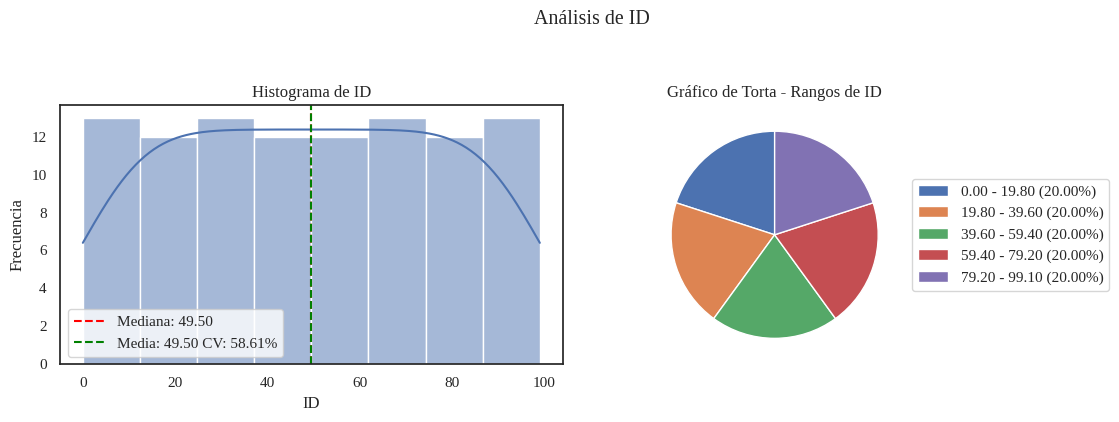

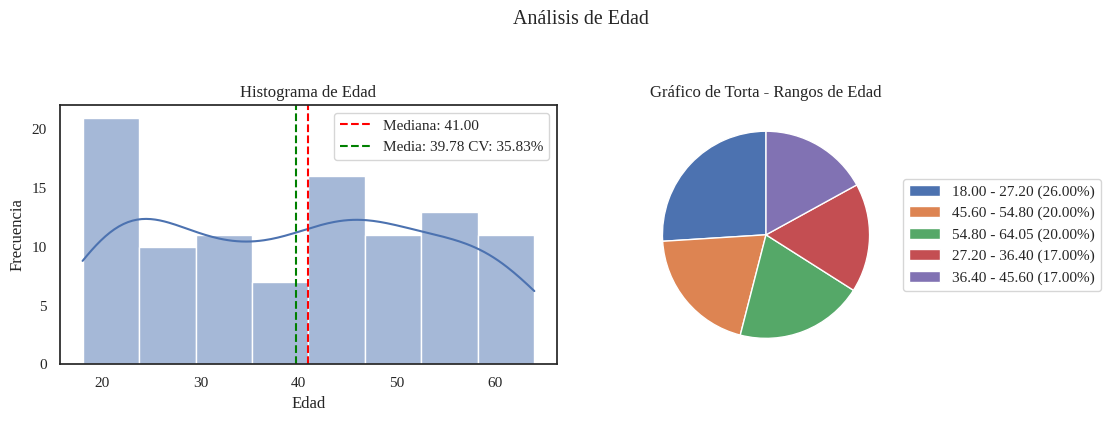

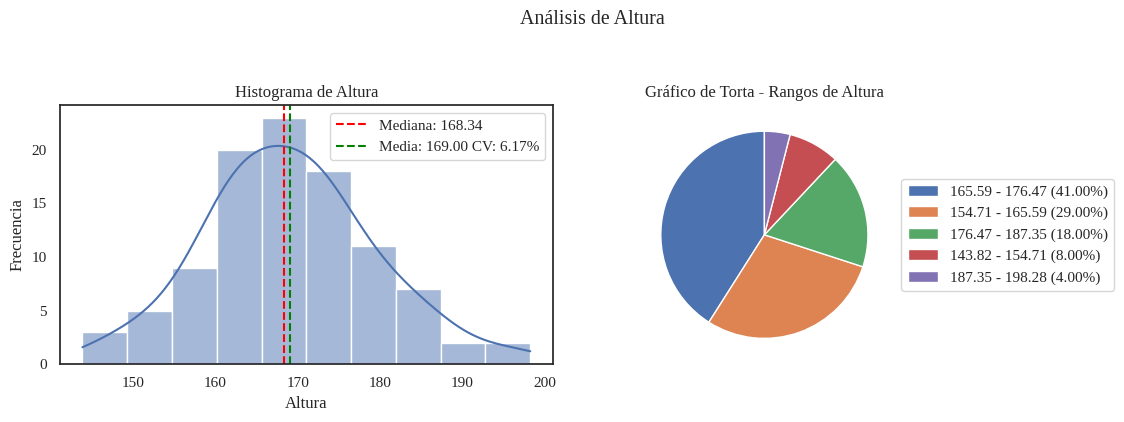

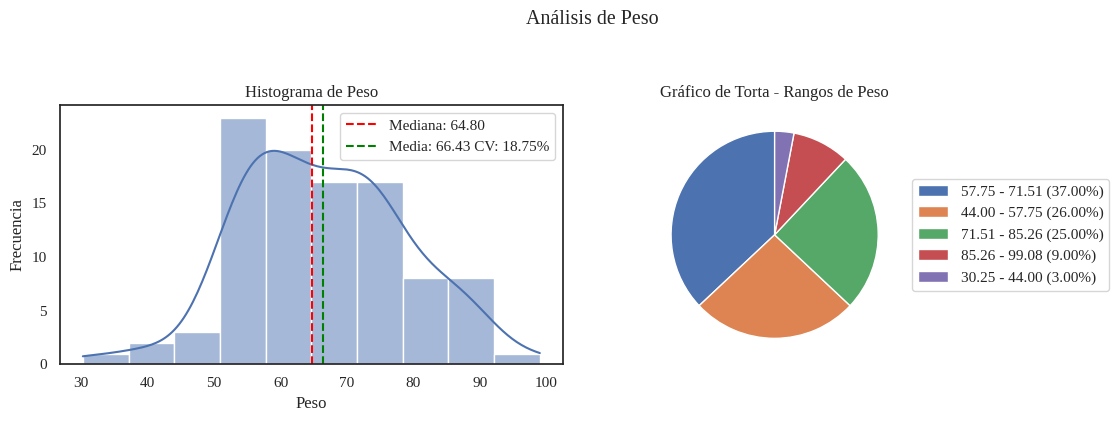

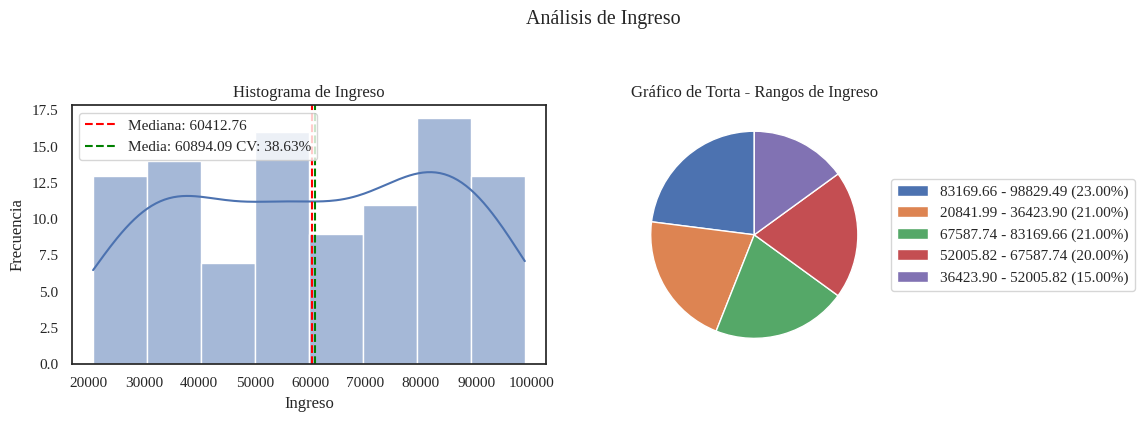


Variables categóricas:
Columna: Categoría
Valores únicos: ['B', 'C', 'A']
Categories (3, object): ['A', 'B', 'C']
Frecuencia de valores:
A    35
C    33
B    32
Name: Categoría, dtype: int64
Proporción de valores:
A    35.00%
C    33.00%
B    32.00%
Name: Categoría, dtype: object



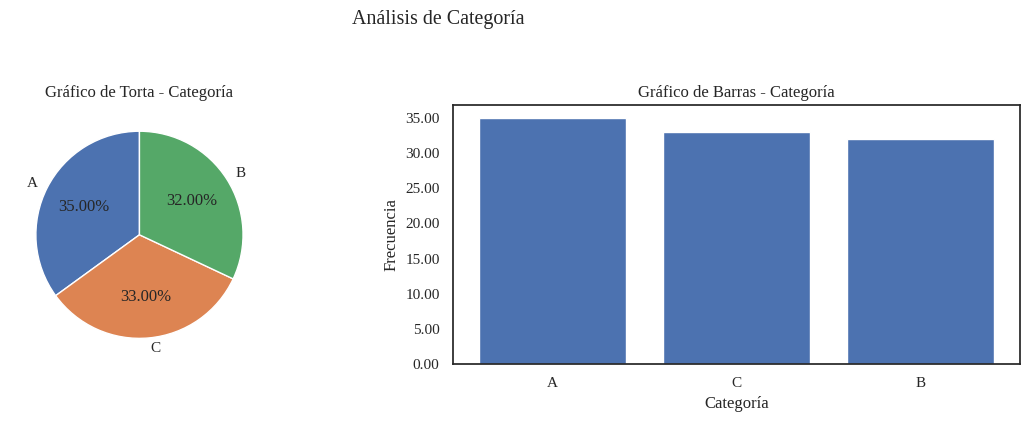

Columna: Variable1
Valores únicos: ['Y', 'Z', 'X']
Categories (3, object): ['X', 'Y', 'Z']
Frecuencia de valores:
X    35
Z    33
Y    32
Name: Variable1, dtype: int64
Proporción de valores:
X    35.00%
Z    33.00%
Y    32.00%
Name: Variable1, dtype: object



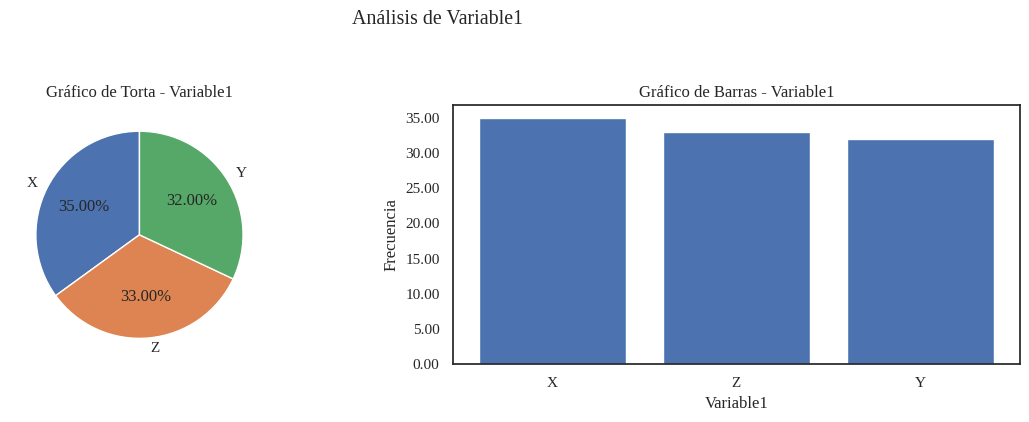

Columna: Variable2
Valores únicos: ['R', 'Q', 'P']
Categories (3, object): ['P', 'Q', 'R']
Frecuencia de valores:
R    39
Q    32
P    29
Name: Variable2, dtype: int64
Proporción de valores:
R    39.00%
Q    32.00%
P    29.00%
Name: Variable2, dtype: object



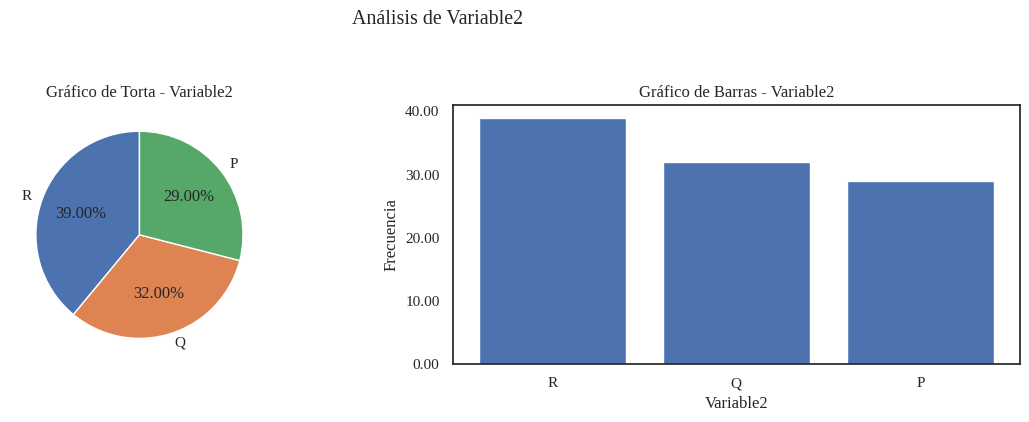

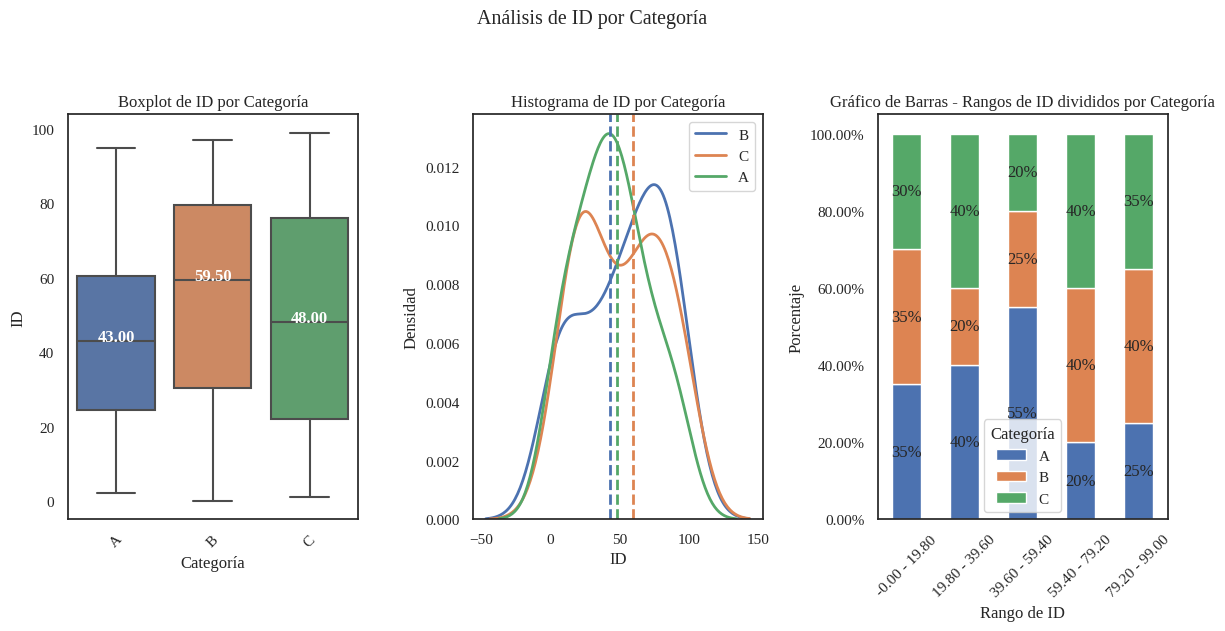

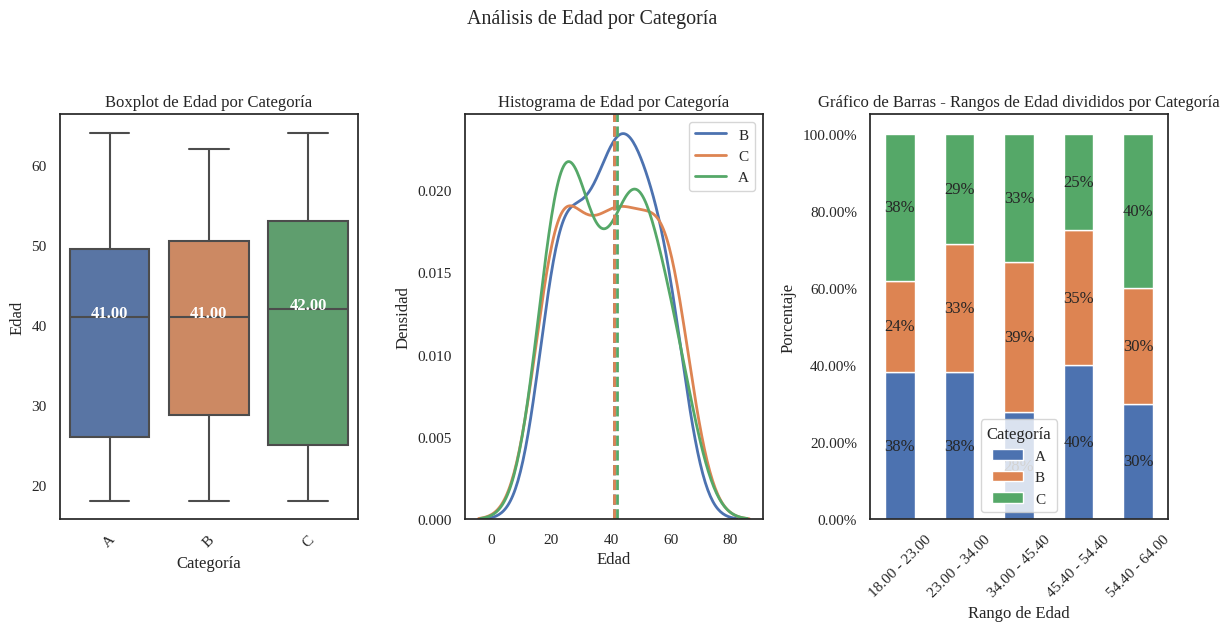

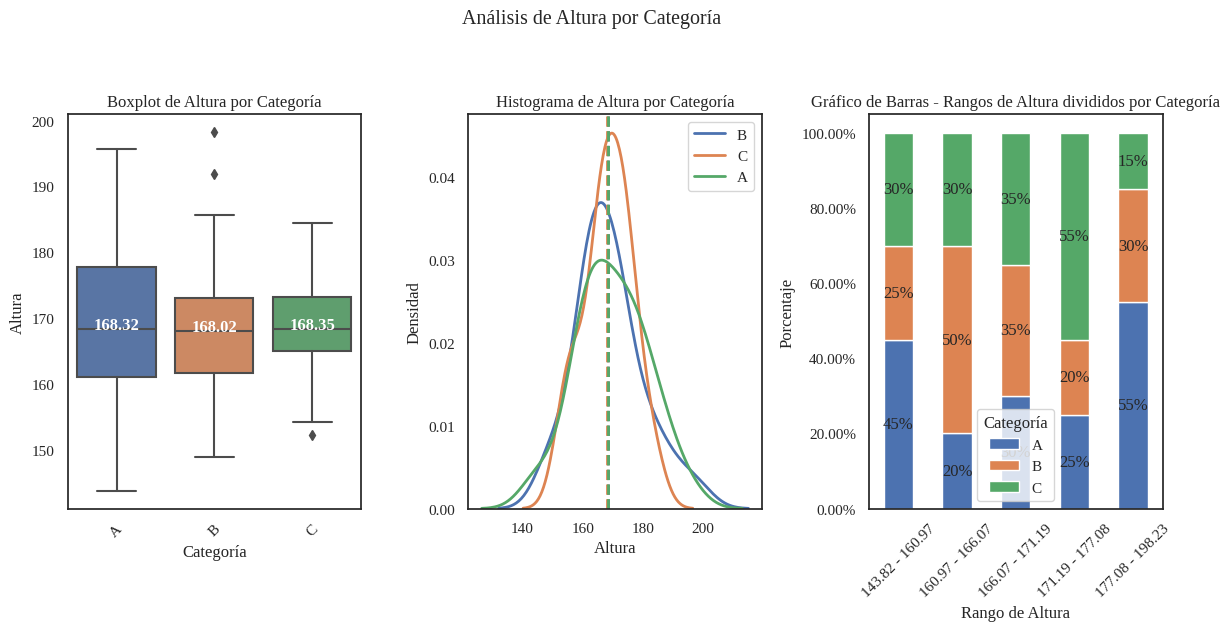

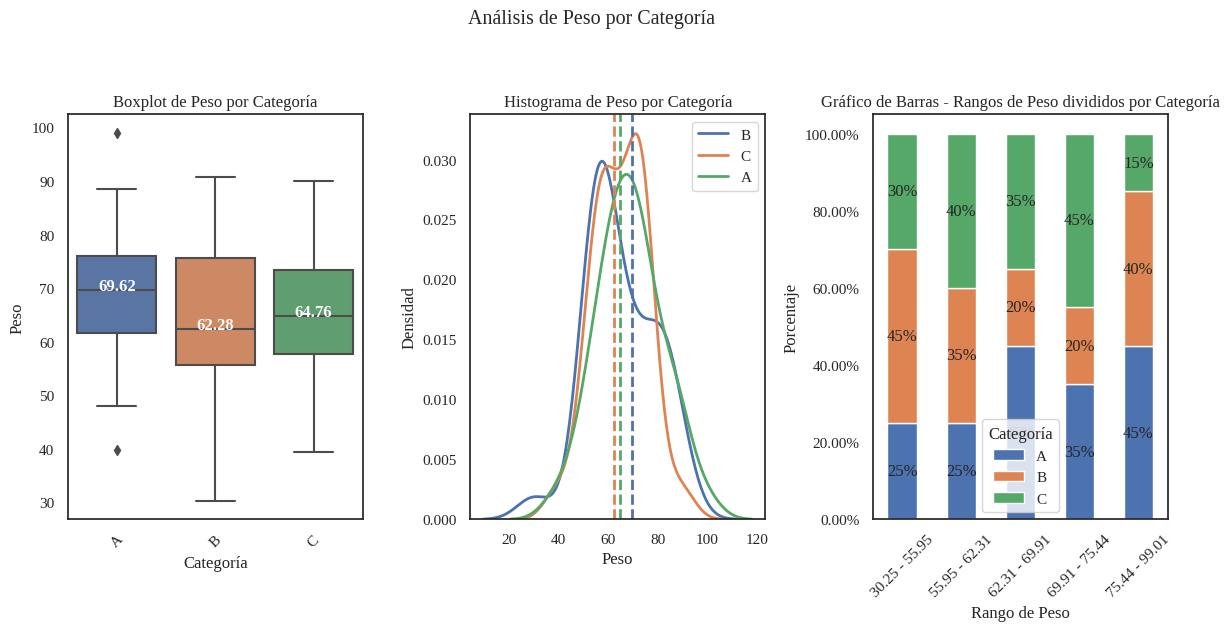

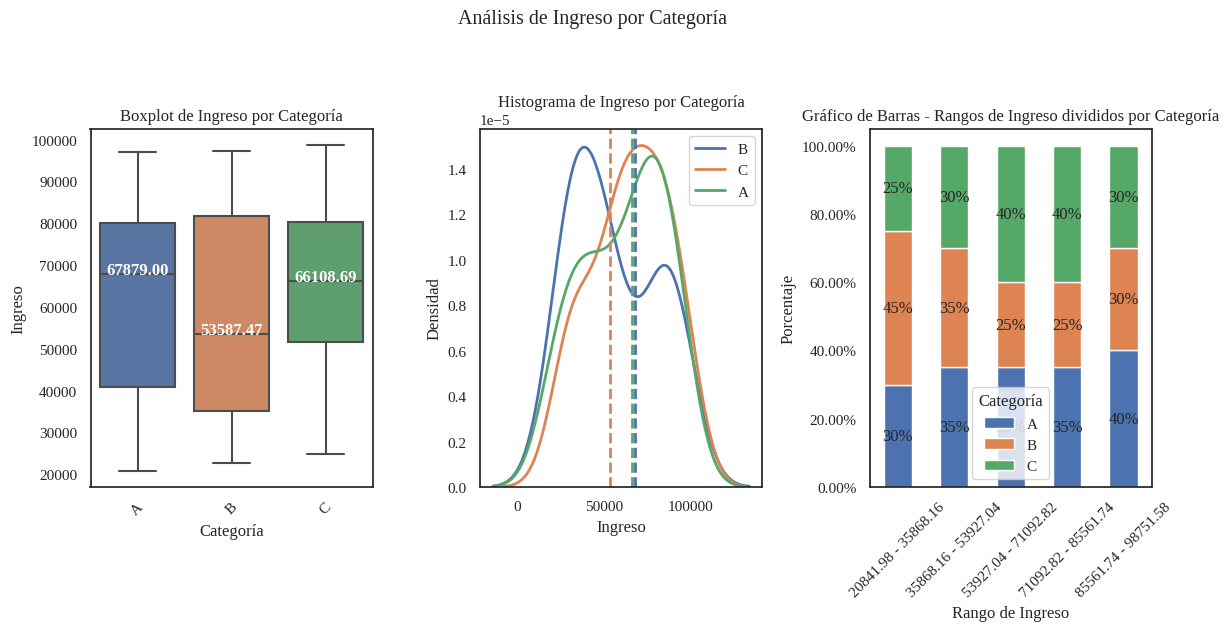

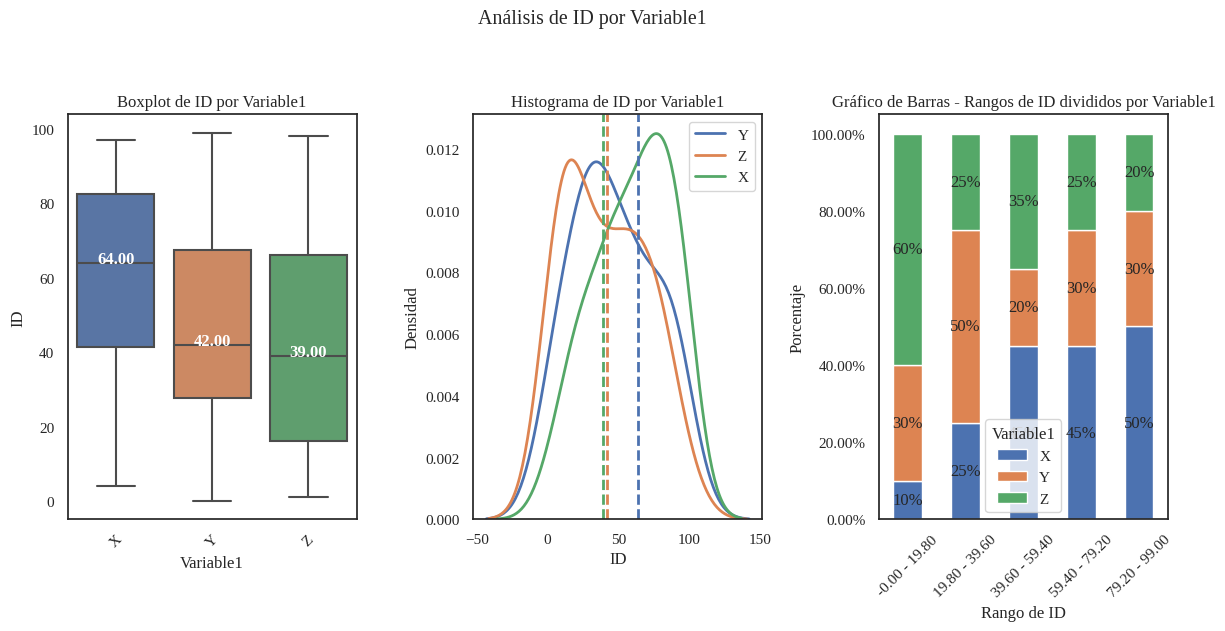

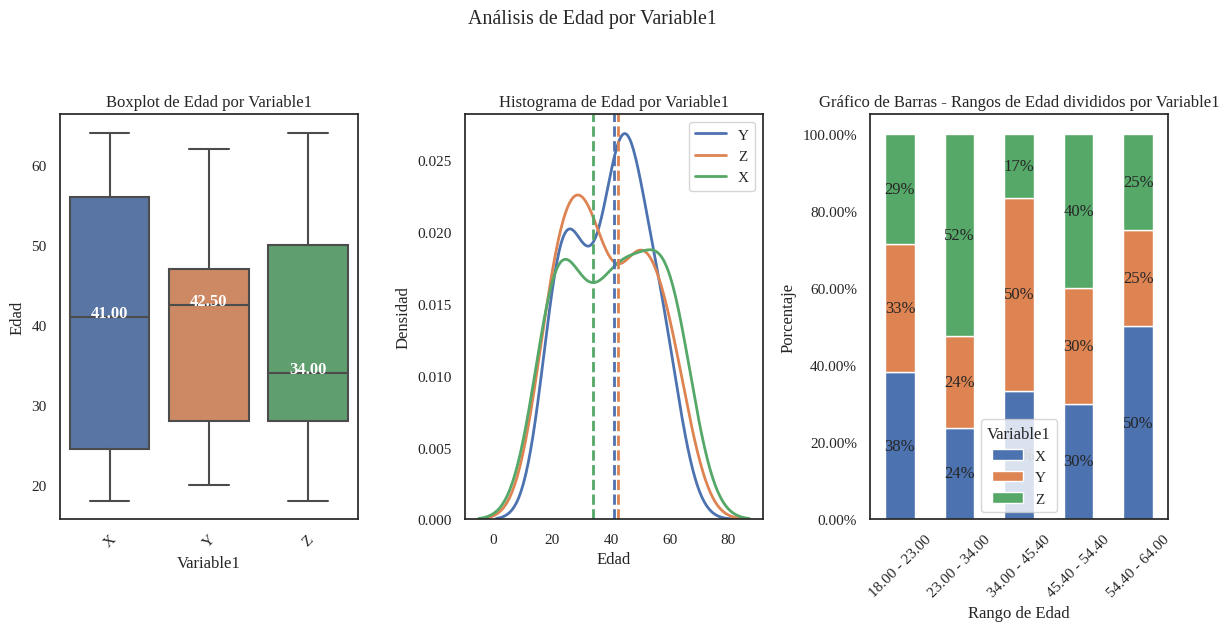

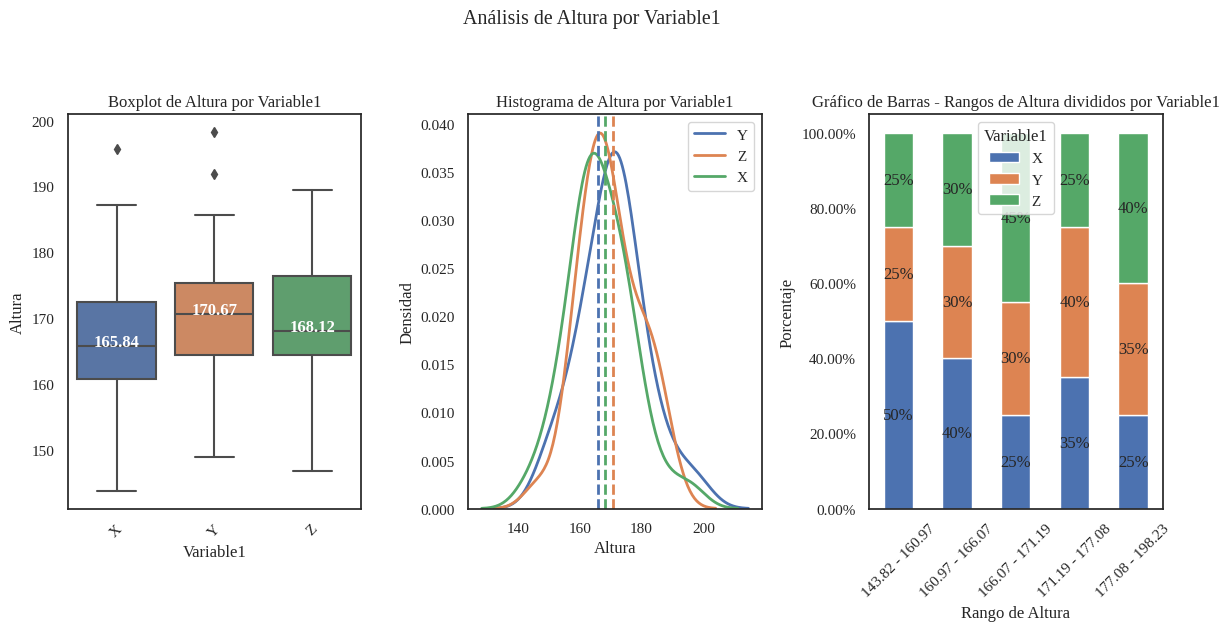

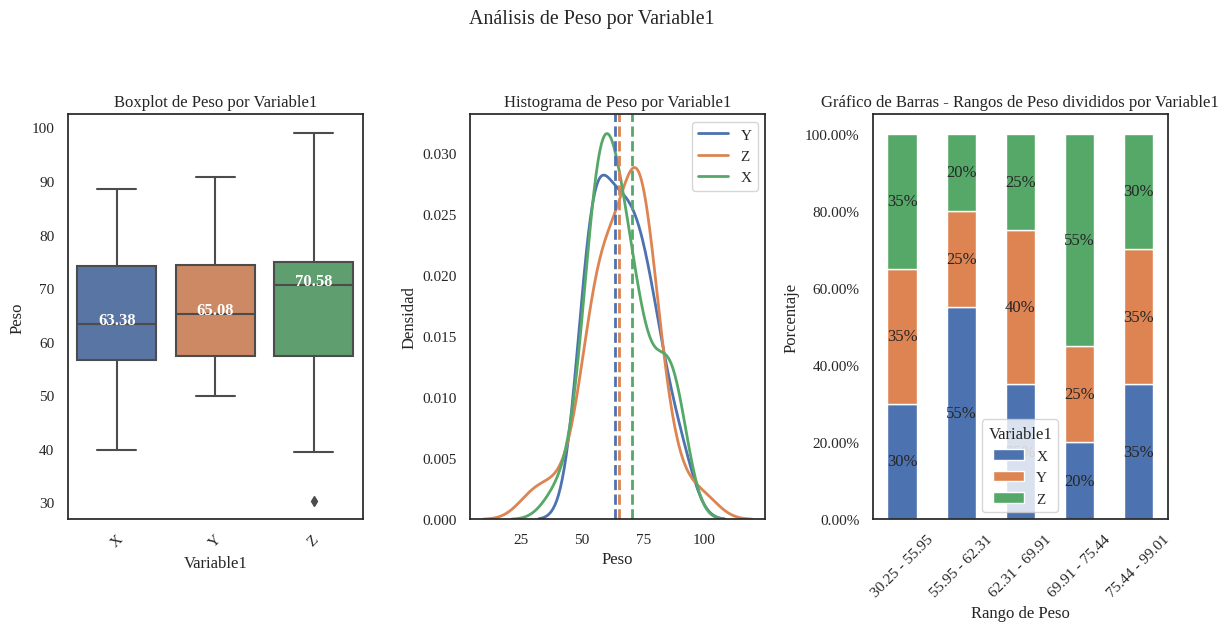

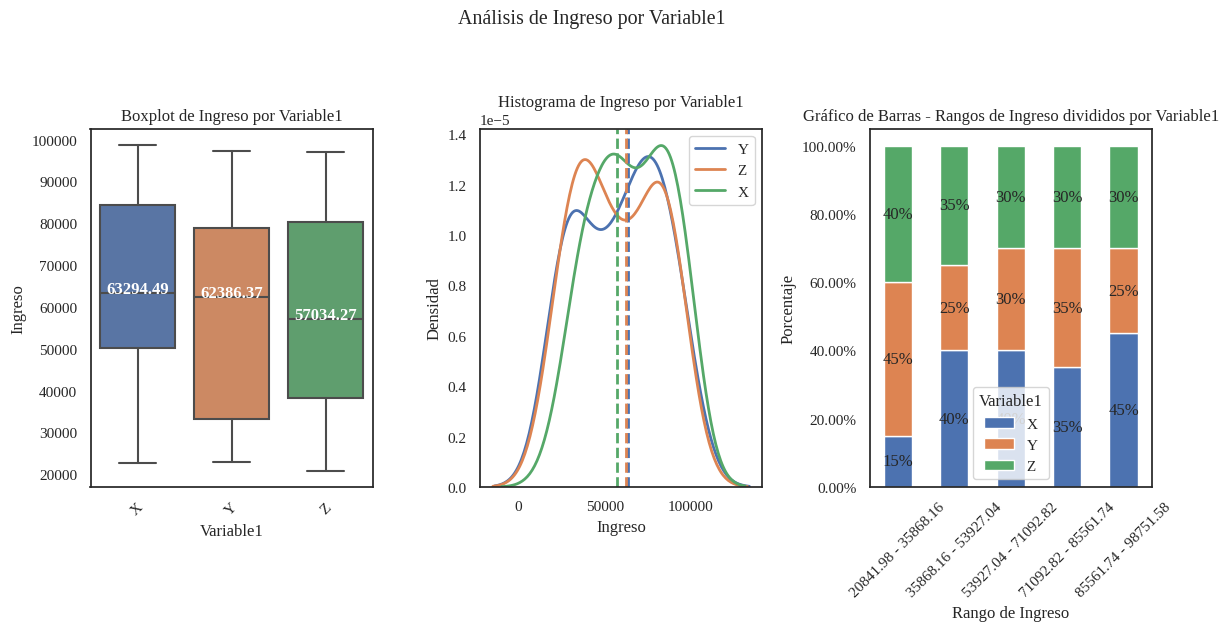

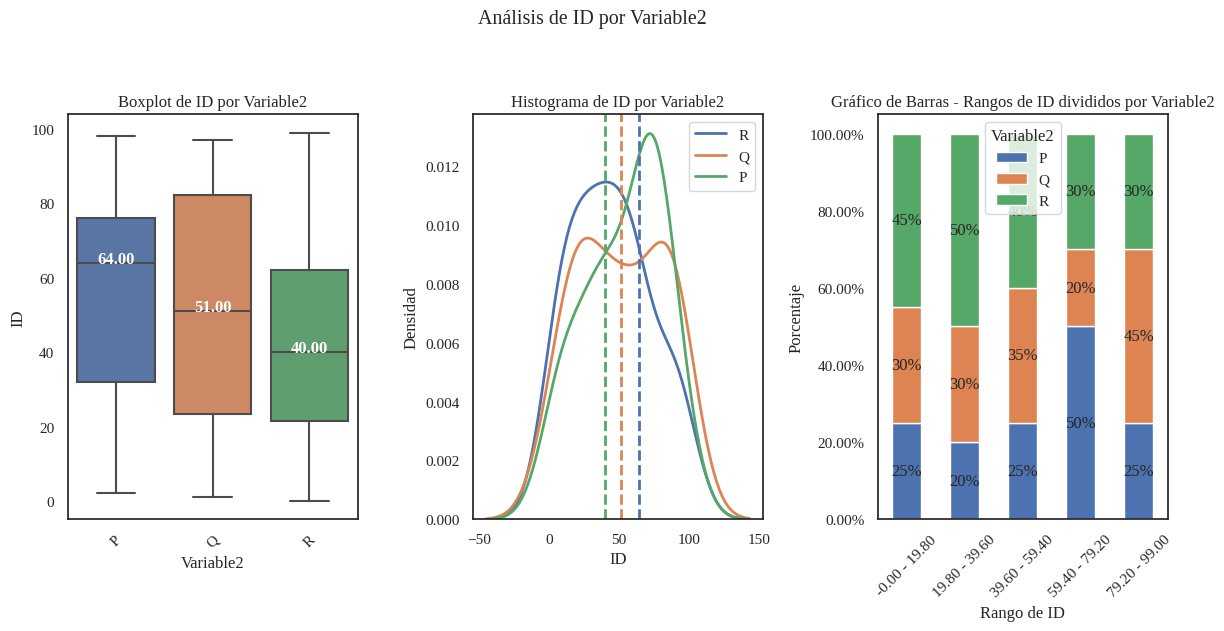

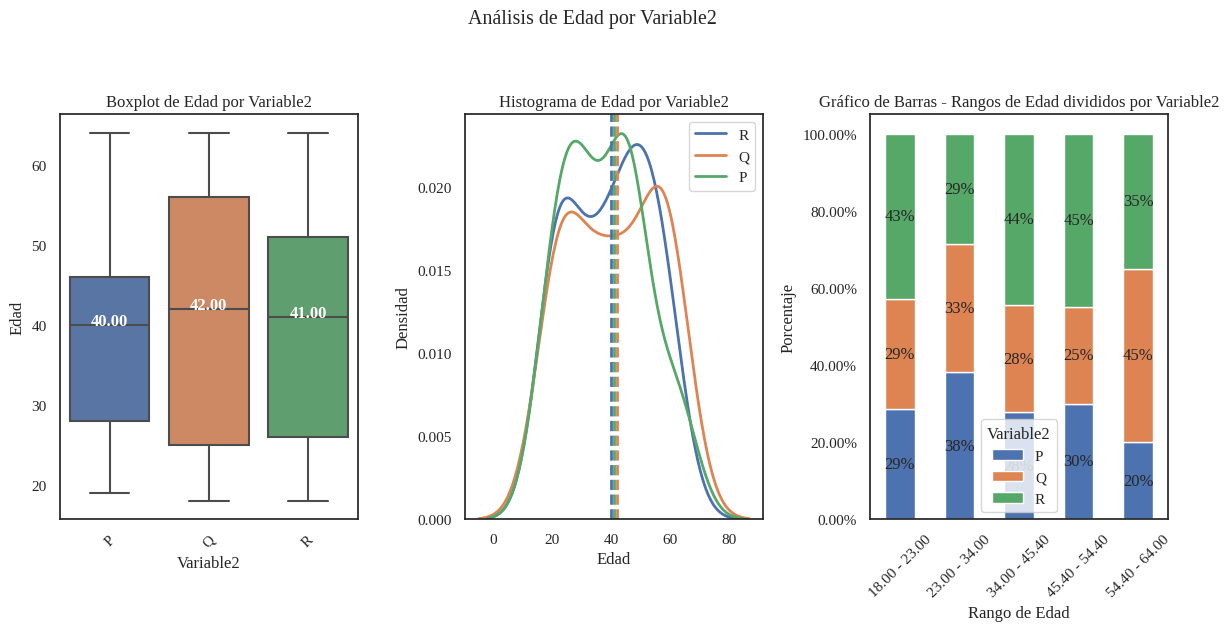

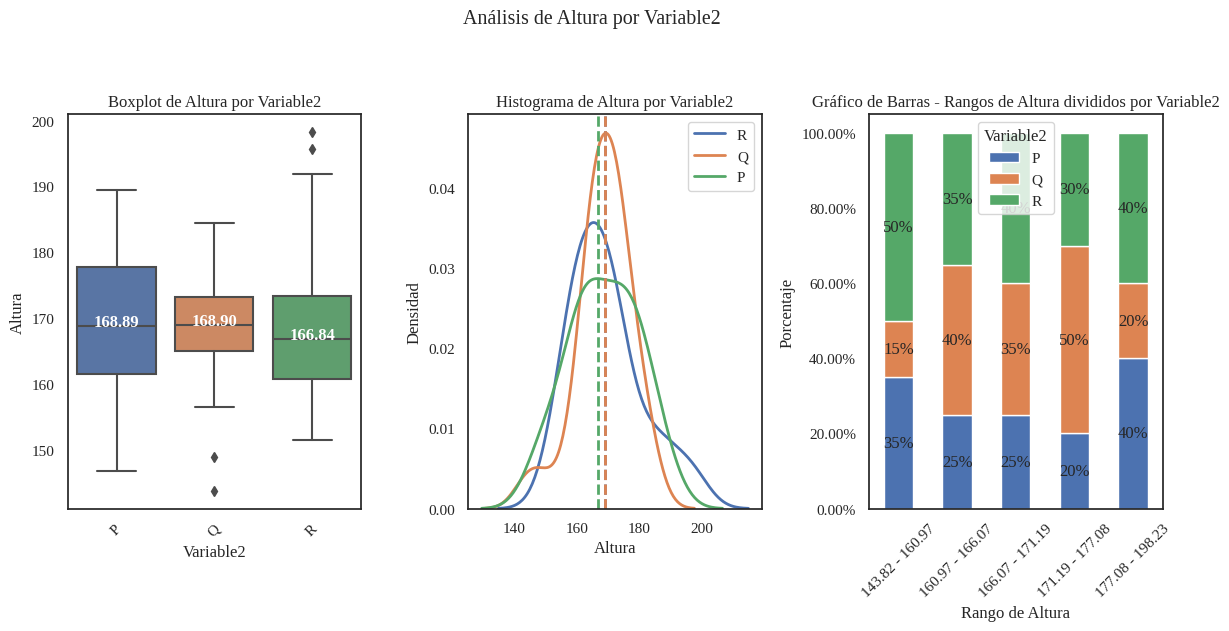

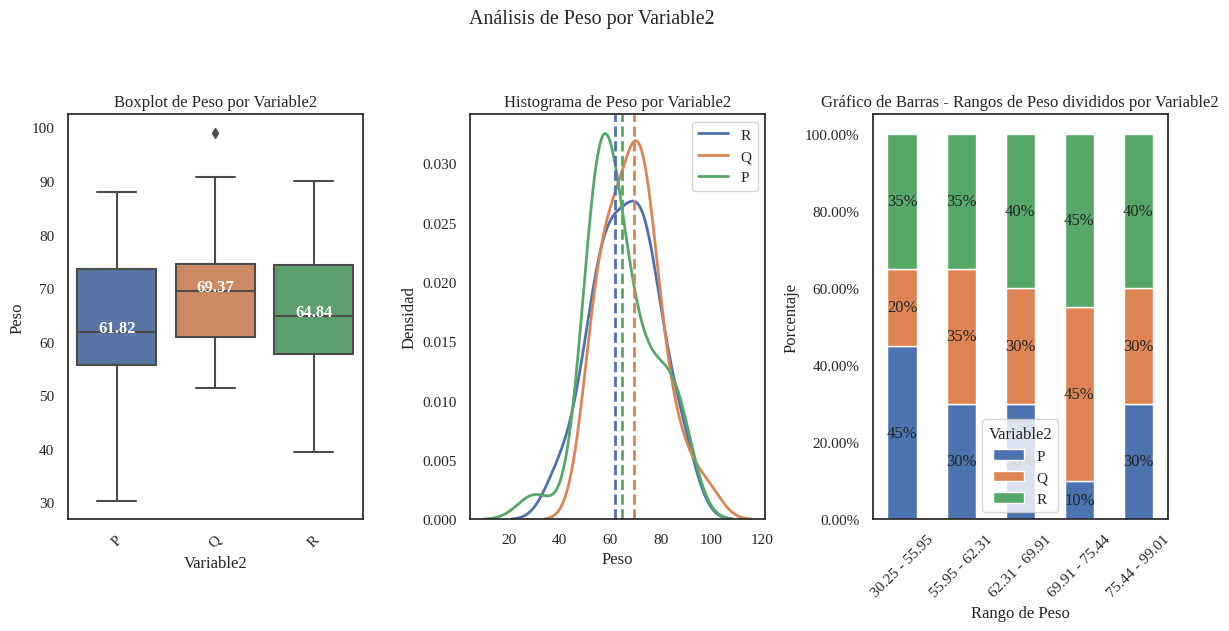

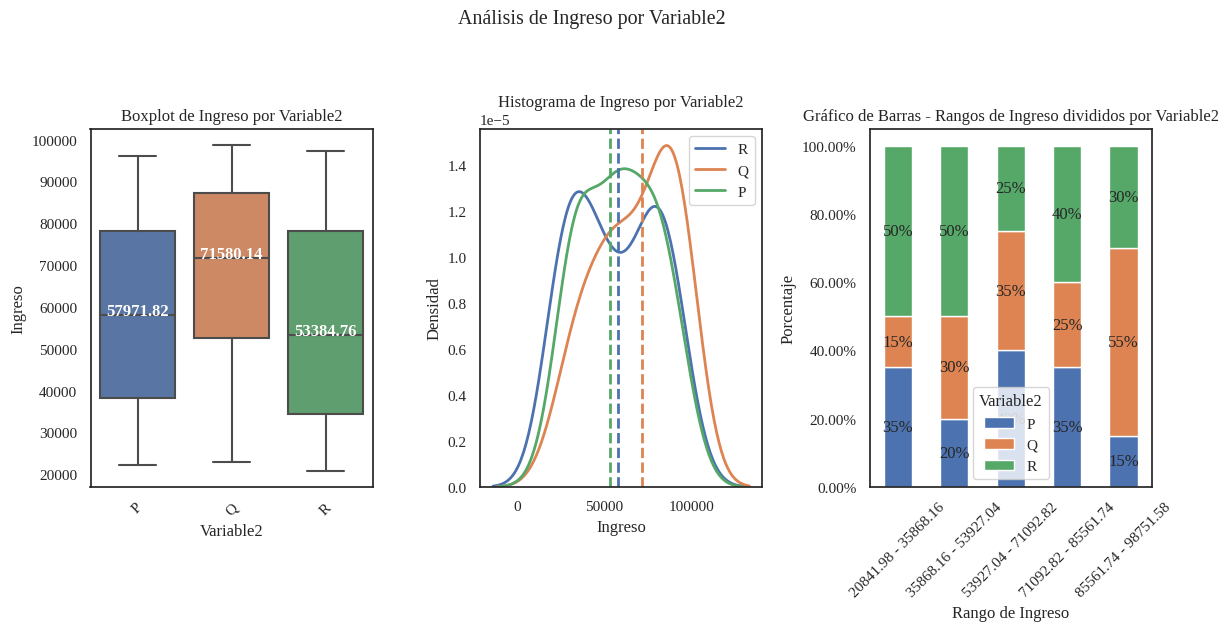

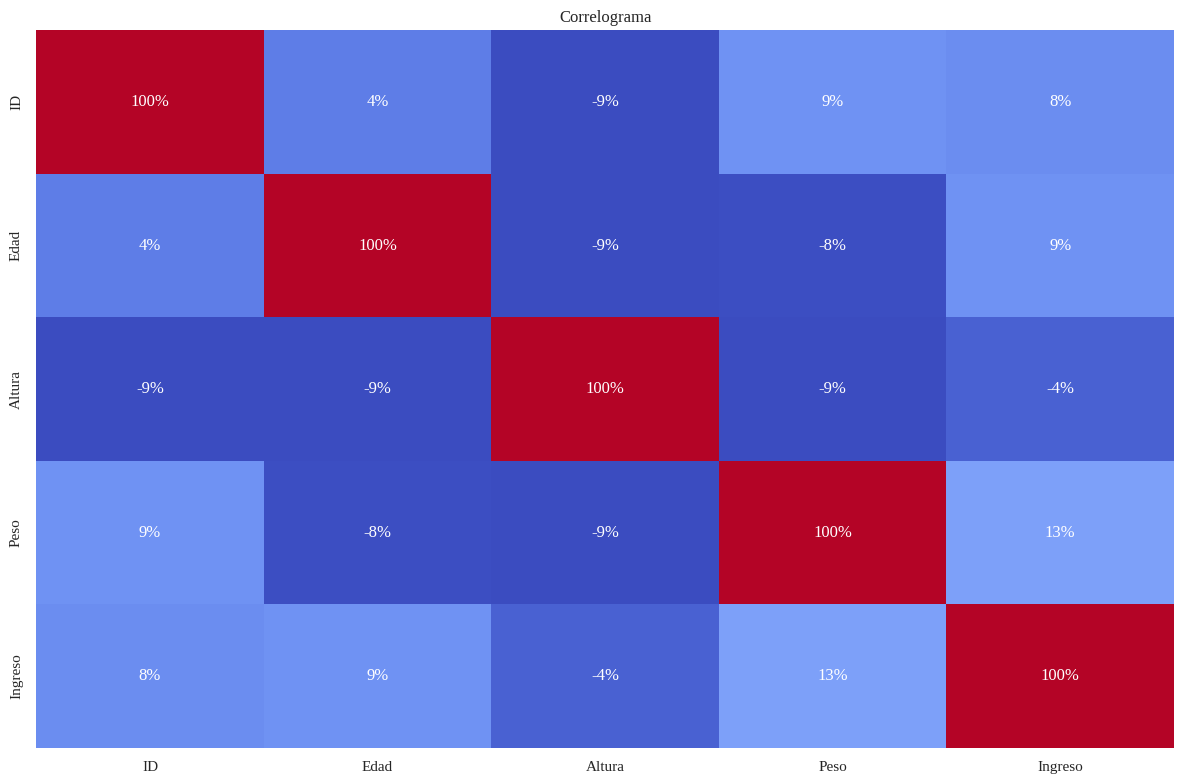

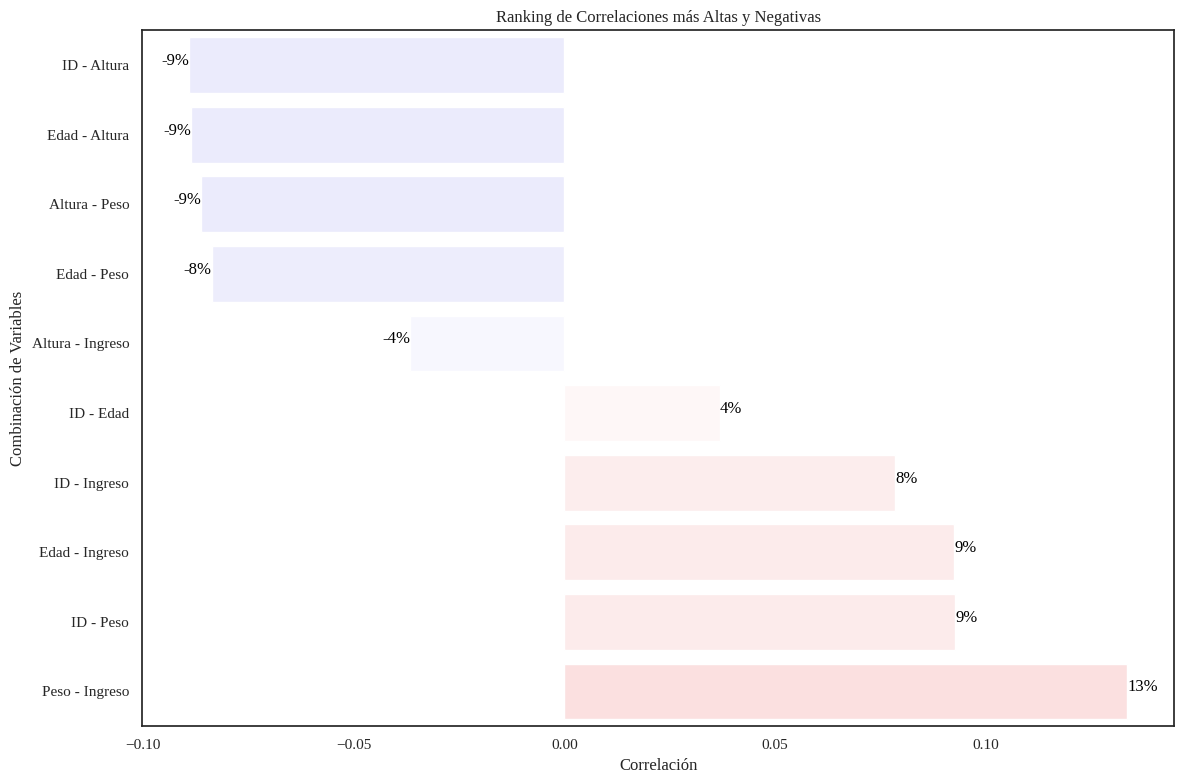

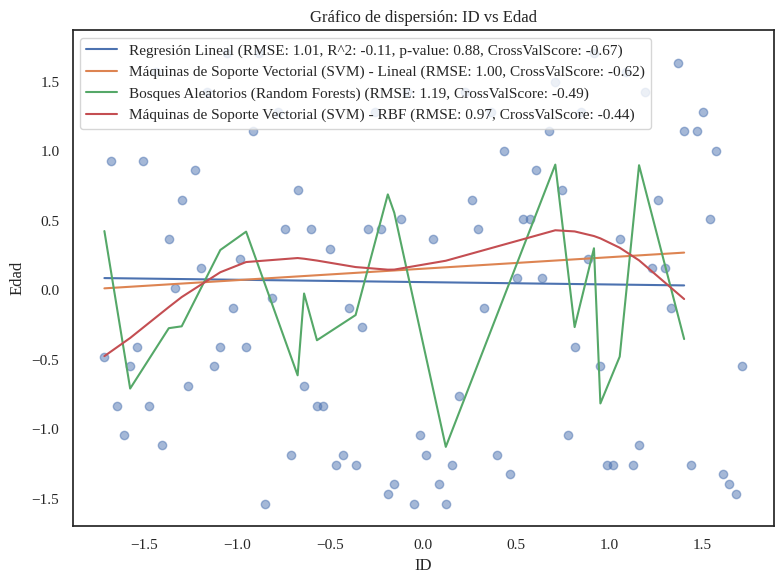

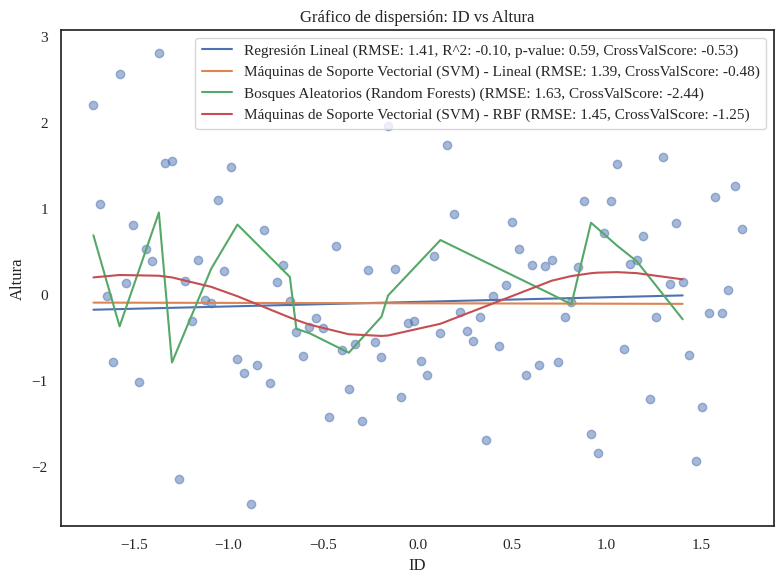

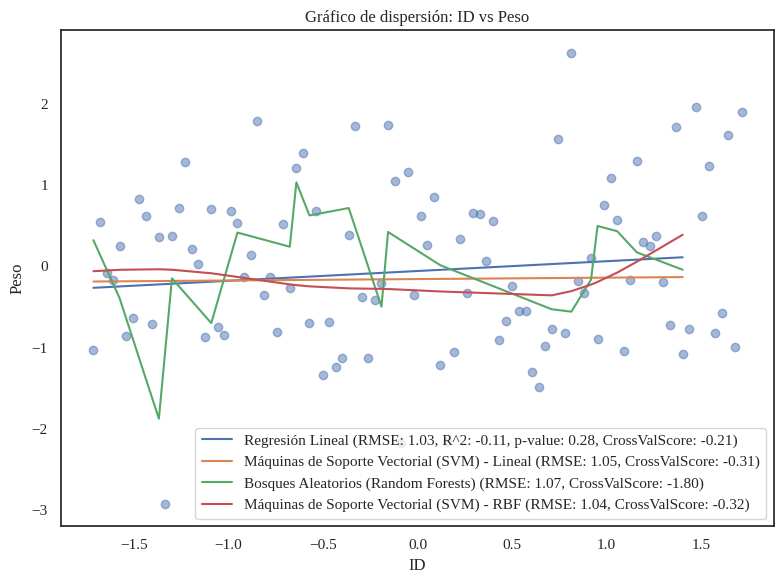

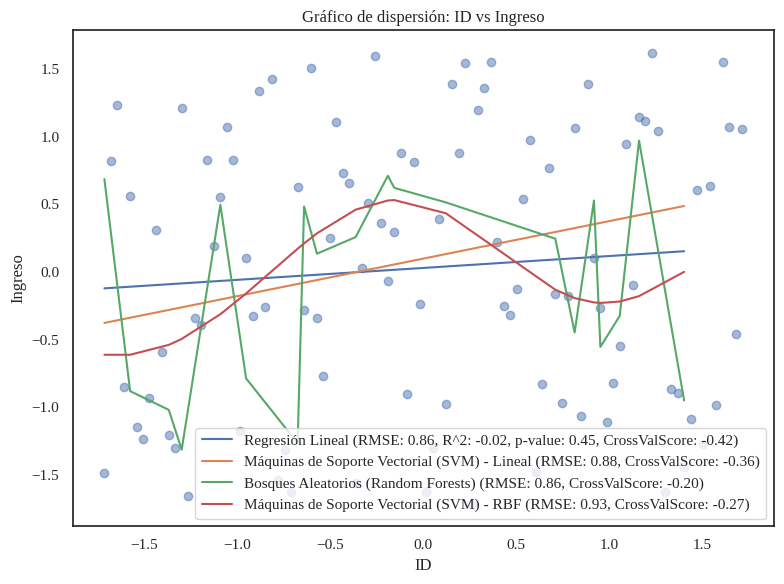

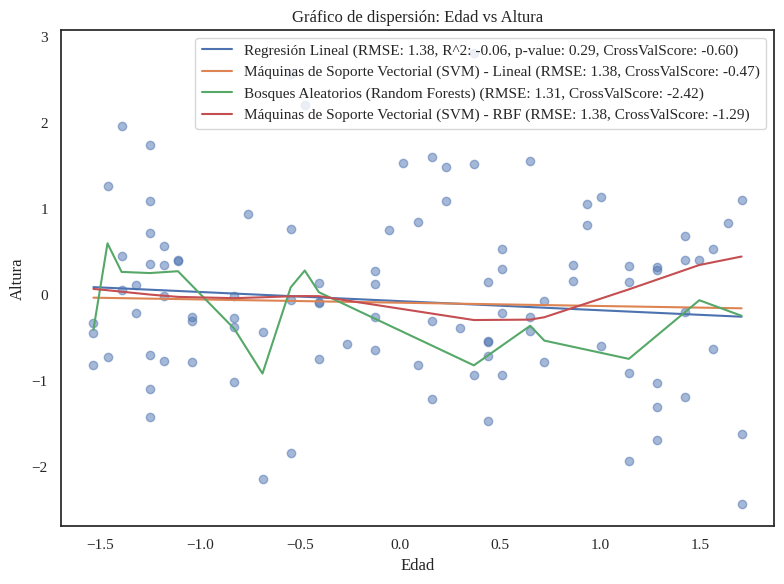

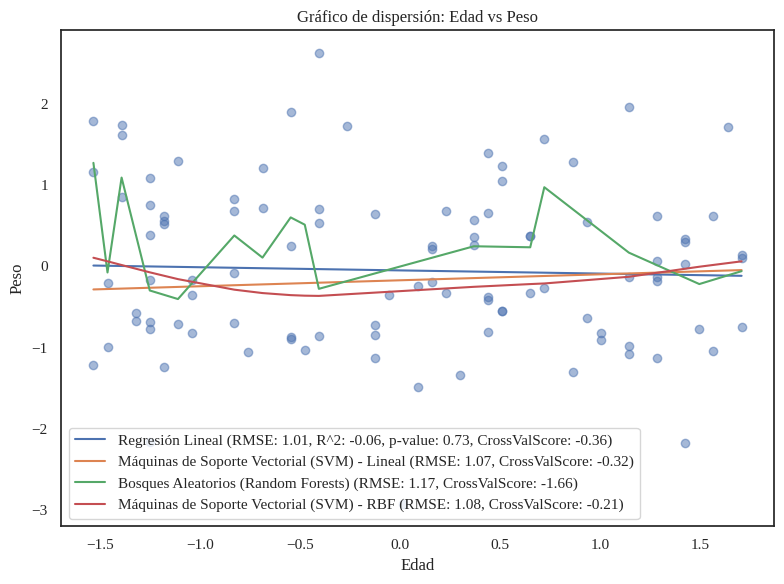

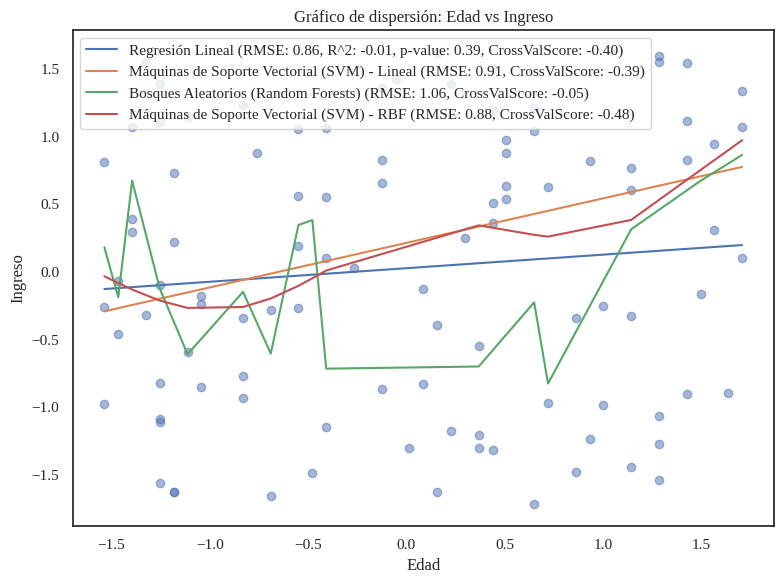

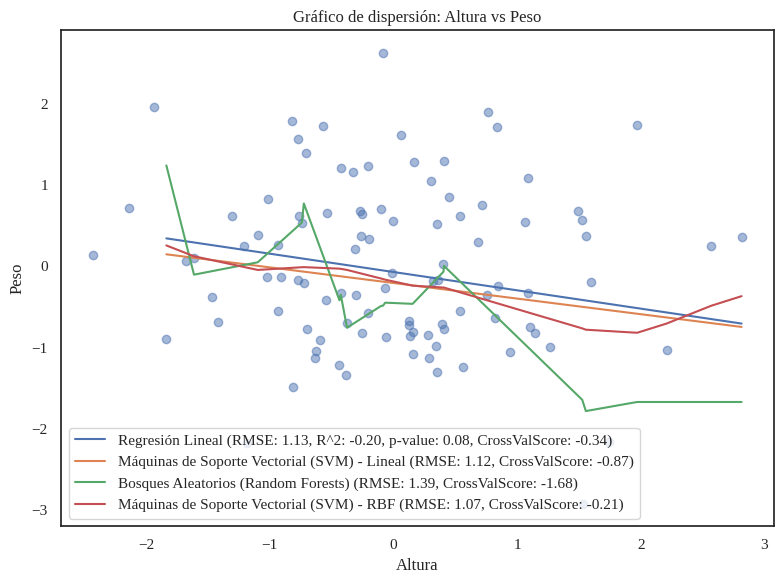

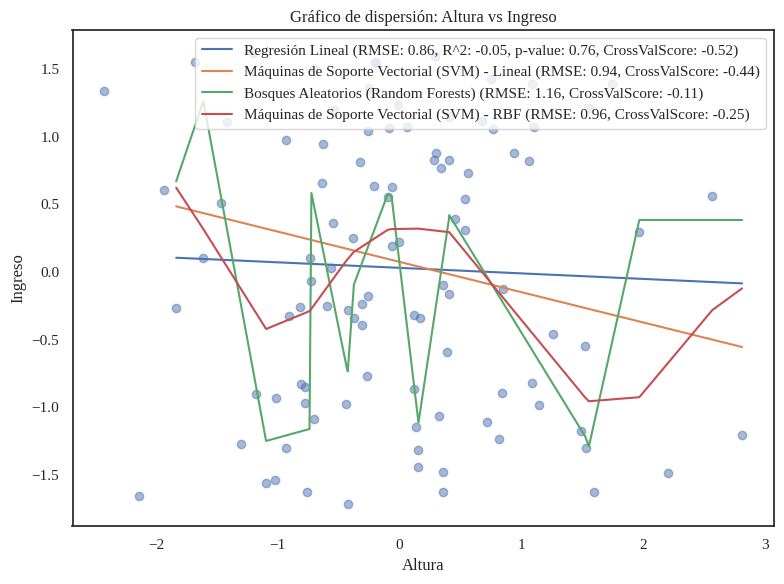

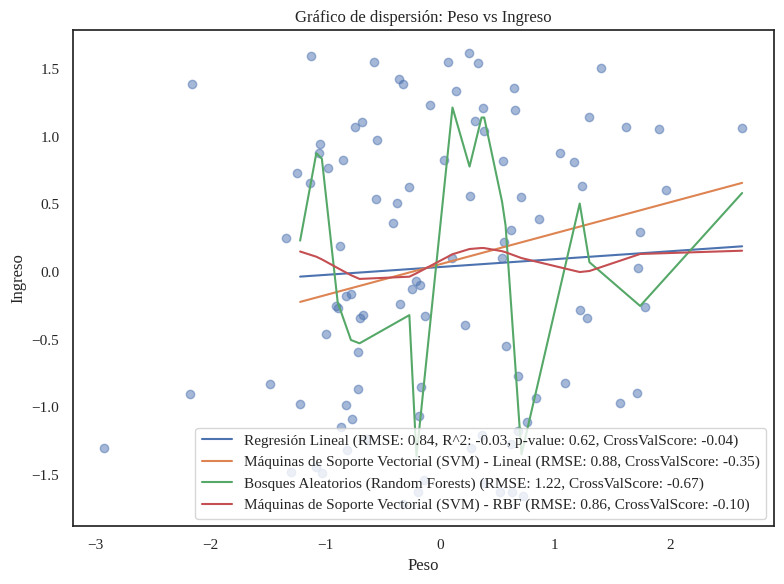

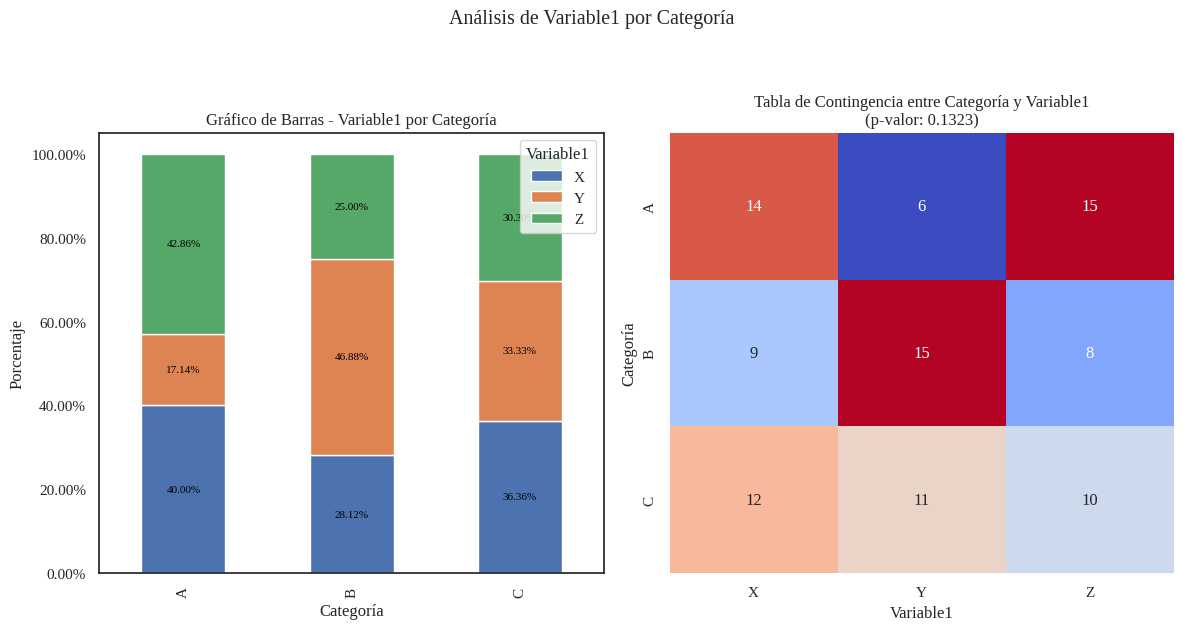

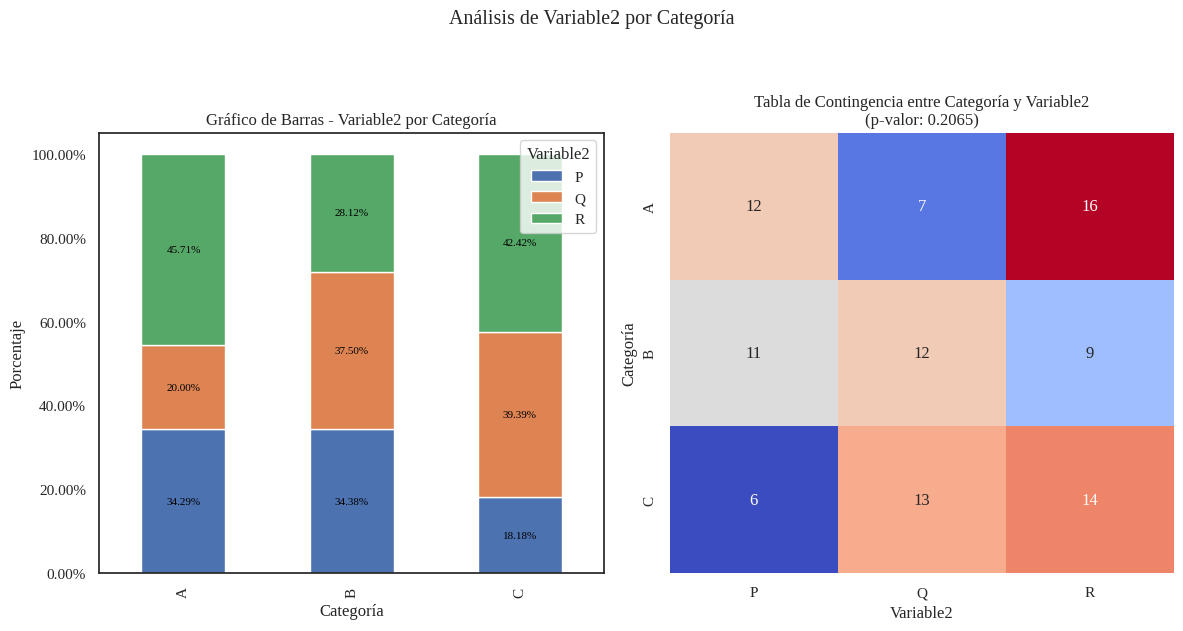

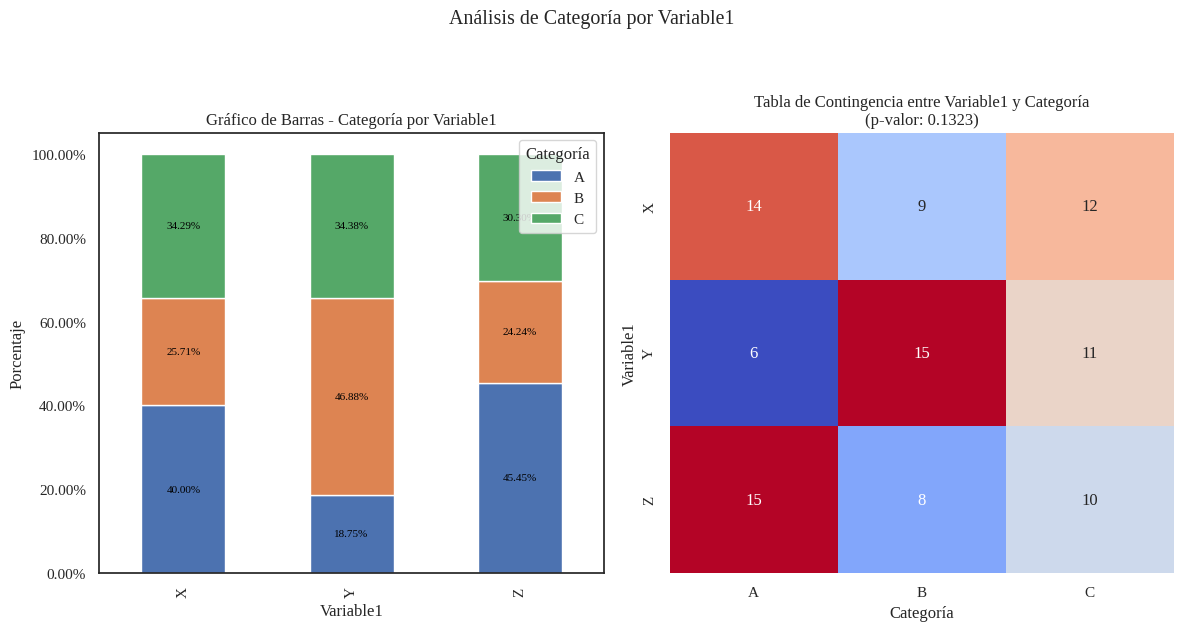

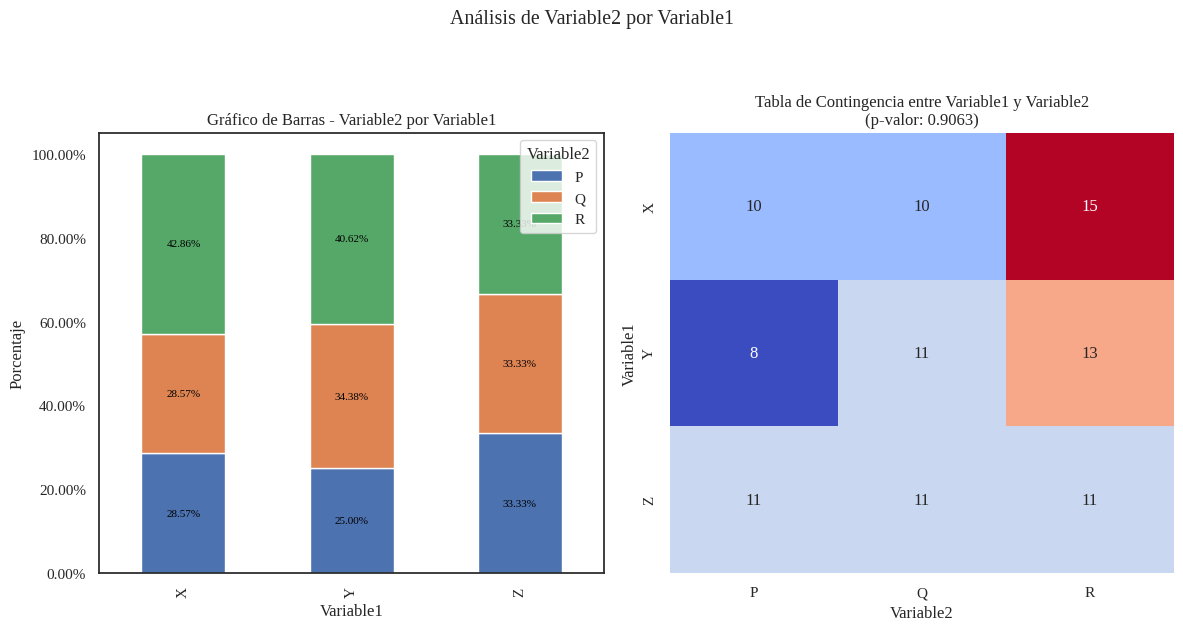

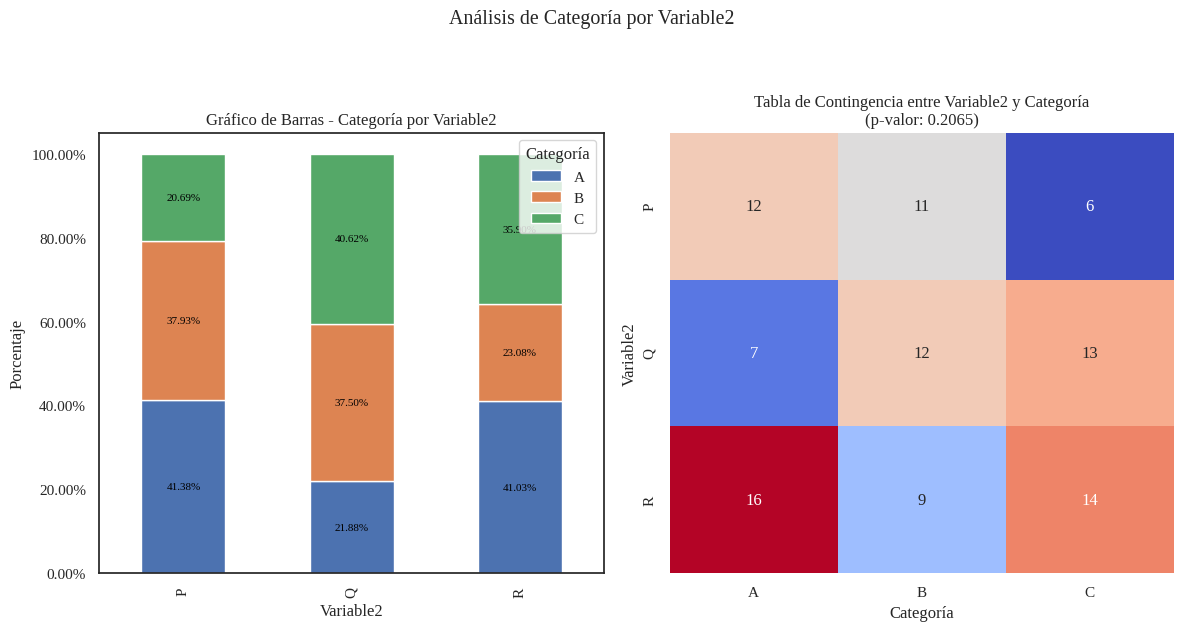

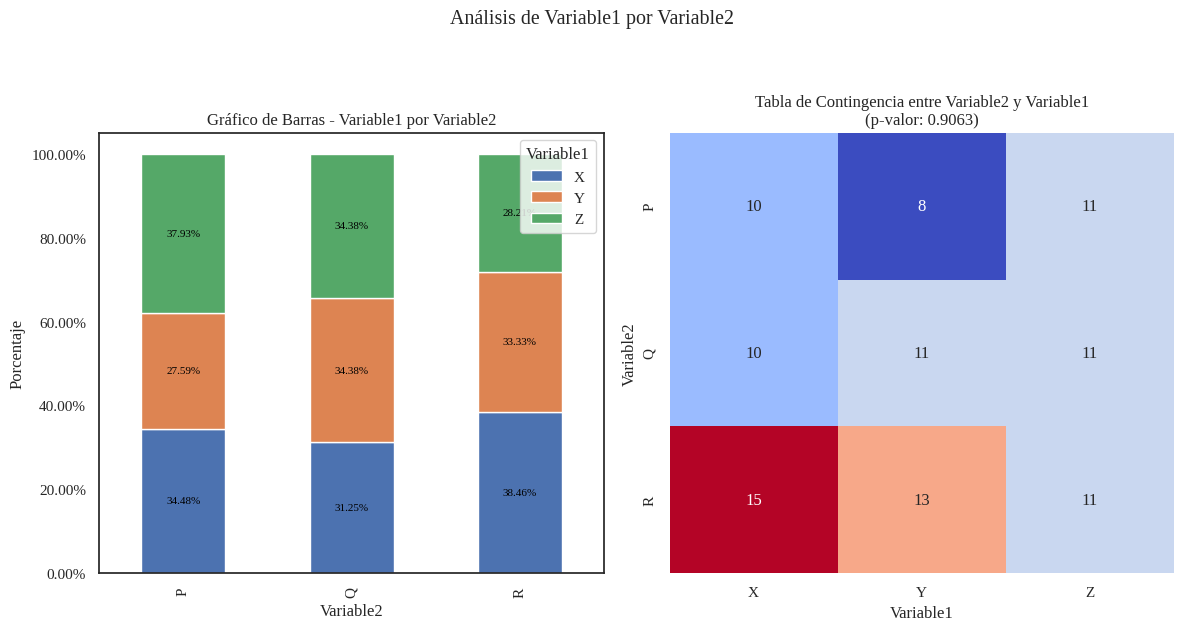

In [326]:
#Correr la función de análisis de datos
analizar_dataset(df)